In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv(".\\Training Data\Linear_X_Train.csv")

In [3]:
dfy=pd.read_csv(".\\Training Data\Linear_Y_Train.csv")

In [62]:
xtrain=dfx.values
ytrain=dfy.values

In [63]:
print(xtrain.shape)

(3750, 1)


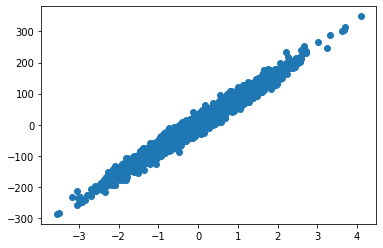

In [64]:
plt.scatter(xtrain,ytrain)
plt.show()

In [117]:
## Helper Functions
def hypothesis(x,theta):
    return theta[0]+theta[1]*x 

def error(X,Y,theta):
    m=X.shape[0]
    err=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        err+=(hx-Y[i])**2 
    return err

def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
        
    return grad

##Algorithm
def gradientDescent(X,Y,learning_rate=0.0001):
    theta= np.zeros((2,))
    itr=0
    max_itr=60
    error_list=[]
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        
        e=error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
    return theta,error_list 


In [118]:
dfxt=pd.read_csv(".\\Test Cases\Linear_X_Test.csv")

In [119]:
xtest=dfxt.values

In [120]:
final_theta,error_list=gradientDescent(xtrain,ytrain)

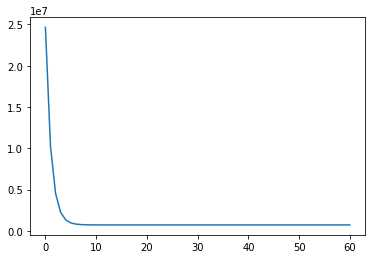

In [121]:
plt.plot(error_list)

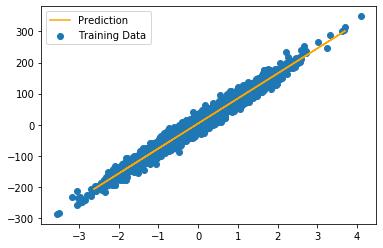

In [128]:
plt.scatter(xtrain,ytrain,label="Training Data")
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()


In [129]:
print(final_theta)

[ 3.72798828 80.54363185]


In [130]:
print(error_list)

[array([24661312.69673235]), array([10259567.26728486]), array([4527084.00020222]), array([2240809.98298864]), array([1327222.67219545]), array([961472.94365533]), array([814781.83966467]), array([755845.77963763]), array([732127.33539688]), array([722566.6697797]), array([718706.95581905]), array([717146.48765381]), array([716514.72338678]), array([716258.61535443]), array([716154.66467795]), array([716112.42350586]), array([716095.23973767]), array([716088.24220653]), array([716085.38996385]), array([716084.22633189]), array([716083.75120909]), array([716083.55706152]), array([716083.47767076]), array([716083.44518469]), array([716083.43188344]), array([716083.42643421]), array([716083.4242006]), array([716083.42328461]), array([716083.4229088]), array([716083.42275455]), array([716083.42269122]), array([716083.4226652]), array([716083.42265451]), array([716083.42265012]), array([716083.42264831]), array([716083.42264757]), array([716083.42264727]), array([716083.42264714]), array([7

In [131]:
print(type(hypothesis(xtest,final_theta)))

<class 'numpy.ndarray'>


In [132]:
print(xtest)

[[-1.87794441]
 [-0.86903192]
 [-2.53018242]
 ...
 [ 0.12800782]
 [-0.27803759]
 [-0.68042543]]


In [133]:
print(hypothesis(xtest,final_theta))

[[-147.52847525]
 [ -66.26699842]
 [-200.06209345]
 ...
 [  14.0382031 ]
 [ -18.66616899]
 [ -51.07594693]]


In [134]:
pd.DataFrame(hypothesis(xtest,final_theta)).to_csv("y.csv")